# William Justice Final Project

### Import Required Packages

In [156]:
from __future__ import print_function, division
import pandas as pd
import sys
import numpy as np
import thinkstats2
import nsfg
from collections import defaultdict
import scipy.stats  as sp
import numpy as np

### Take a look at all variables

In [157]:
df = nsfg.ReadFemPreg()
for col in df.columns: 
    print(col) 

caseid
pregordr
howpreg_n
howpreg_p
moscurrp
nowprgdk
pregend1
pregend2
nbrnaliv
multbrth
cmotpreg
prgoutcome
cmprgend
flgdkmo1
cmprgbeg
ageatend
hpageend
gestasun_m
gestasun_w
wksgest
mosgest
dk1gest
dk2gest
dk3gest
bpa_bdscheck1
bpa_bdscheck2
bpa_bdscheck3
babysex
birthwgt_lb
birthwgt_oz
lobthwgt
babysex2
birthwgt_lb2
birthwgt_oz2
lobthwgt2
babysex3
birthwgt_lb3
birthwgt_oz3
lobthwgt3
cmbabdob
kidage
hpagelb
birthplc
paybirth1
paybirth2
paybirth3
knewpreg
trimestr
ltrimest
priorsmk
postsmks
npostsmk
getprena
bgnprena
pnctrim
lpnctri
workpreg
workborn
didwork
matweeks
weeksdk
matleave
matchfound
livehere
alivenow
cmkidied
cmkidlft
lastage
wherenow
legagree
parenend
anynurse
fedsolid
frsteatd_n
frsteatd_p
frsteatd
quitnurs
ageqtnur_n
ageqtnur_p
ageqtnur
matchfound2
livehere2
alivenow2
cmkidied2
cmkidlft2
lastage2
wherenow2
legagree2
parenend2
anynurse2
fedsolid2
frsteatd_n2
frsteatd_p2
frsteatd2
quitnurs2
ageqtnur_n2
ageqtnur_p2
ageqtnur2
matchfound3
livehere3
alivenow3
cmkidied3
cmkid

In [158]:
df.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


### Subset for needed variables
** Plus make new dataframe + view

#### Explination of chosen Variables
** prglngth = integer duration of pregnancy in weeks.

** birthord = serial number for live births; code for first child is one and so on.

** birthwgt_lbs = pounds of baby at birth.

** agepreg = mothers age at end of pregnancy.

** outcome = interger code for outcome of birth; 1 means live birth.

In [159]:
data = df[['prglngth', 'birthord', 'birthwgt_lb', 'agepreg', 'outcome'] ] 

In [160]:
data.head()

,prglngth,birthord,birthwgt_lb,agepreg,outcome
0,39,1.0,8.0,33.16,1
1,39,2.0,7.0,39.25,1
2,39,1.0,9.0,14.33,1
3,39,2.0,7.0,17.83,1
4,39,3.0,6.0,18.33,1


### Subset to only live births 

In [161]:
livedata = data[data['outcome'] == 1]

In [162]:
print(livedata)

       prglngth  birthord  birthwgt_lb  agepreg  outcome
0            39       1.0          8.0    33.16        1
1            39       2.0          7.0    39.25        1
2            39       1.0          9.0    14.33        1
3            39       2.0          7.0    17.83        1
4            39       3.0          6.0    18.33        1
...         ...       ...          ...      ...      ...
13581        39       1.0          6.0    30.66        1
13584        34       1.0          6.0    26.91        1
13588        39       1.0          6.0    17.91        1
13591        39       2.0          7.0    21.58        1
13592        39       3.0          7.0    21.58        1

[9148 rows x 5 columns]


## Histogram for all 5 vairables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A0C8512F48>,
      dtype=object)

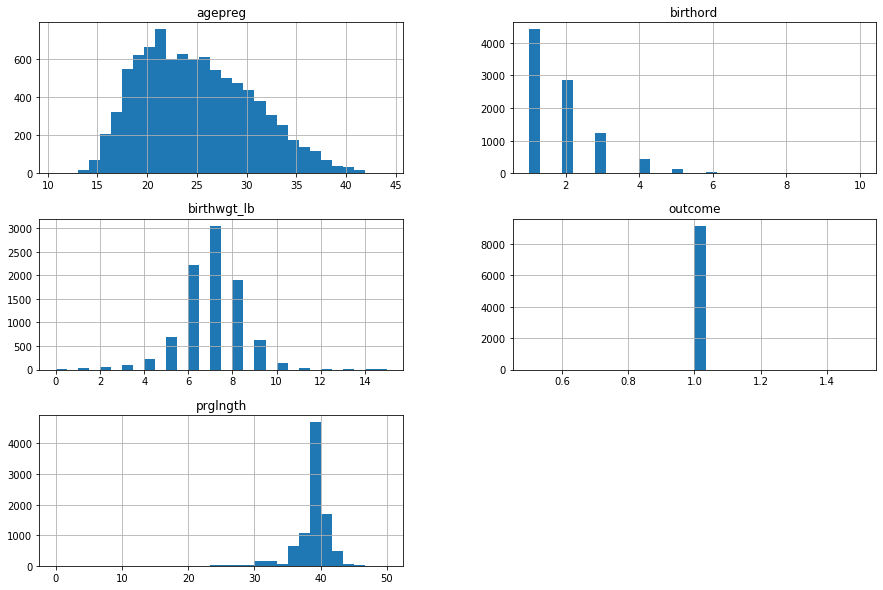

In [163]:
livedata.hist(bins=30, figsize=(15, 10))

### Outlier Detection

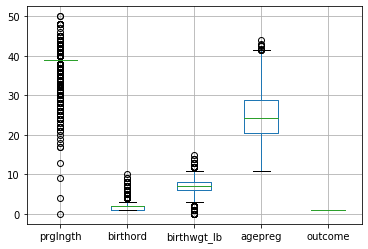

In [164]:
livedata.boxplot()

### Outlier Explination 

** It would appear that the statistal outliers are all within reason for actual pregnancies with the exception of the prglngth variable. As the prglngth has been subsetted to live births there are a fair amount of outlier. After some research, the youngest baby to be born and survive was delivered at 25 weeks & 6 days. Thus, I bleive the data should be further subsetted to only respondant > 26 weeks. 

### Further Subsetting from outlier detection. 

In [165]:
livedata1 = livedata[livedata['prglngth'] > 26]

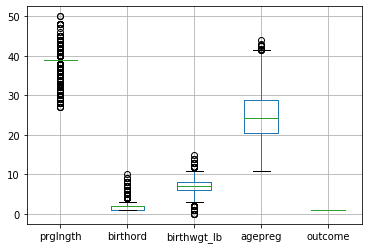

In [166]:
livedata1.boxplot()

** Now we still have statistical outliers, but to my knowledge this is the best way to handle for a realist look at the "live" births which survive.

### Descriptive Stats of Each Variable

#### Mean 

In [167]:
livedata1.mean()

prglngth       38.678013
birthord        1.824741
birthwgt_lb     6.864020
agepreg        24.935869
outcome         1.000000
dtype: float64

#### Mode

In [168]:
livedata1.mode()

,prglngth,birthord,birthwgt_lb,agepreg,outcome
0,39,1.0,7.0,22.75,1


#### Range

In [169]:
print("\n----------- Minimum -----------\n")
print(livedata1[['prglngth', 'birthord', 'birthwgt_lb', 'agepreg']].min())
 
print("\n----------- Maximum -----------\n")
print(livedata1[['prglngth', 'birthord', 'birthwgt_lb', 'agepreg']].max())


----------- Minimum -----------

prglngth       27.00
birthord        1.00
birthwgt_lb     0.00
agepreg        10.83
dtype: float64

----------- Maximum -----------

prglngth       50.00
birthord       10.00
birthwgt_lb    15.00
agepreg        44.08
dtype: float64


#### Tails
** IQR above or below 25% and 75% respectively

In [170]:
livedata1.describe()

,prglngth,birthord,birthwgt_lb,agepreg,outcome
count,9078.000000,9078.000000,9016.000000,9078.000000,9078.0
mean,38.678013,1.824741,6.864020,24.935869,1.0
std,2.318095,1.039708,1.354571,5.562236,0.0
min,27.000000,1.000000,0.000000,10.830000,1.0
25%,39.000000,1.000000,6.000000,20.500000,1.0
50%,39.000000,2.000000,7.000000,24.330000,1.0
75%,39.000000,2.000000,8.000000,28.910000,1.0
max,50.000000,10.000000,15.000000,44.080000,1.0


# PMF
** I want to to a PMF scenario of agepreg. To make this easier I will need to remove the decimals from the column. This will just make the visualizations much less messy. 
** This will help see if age of pregnancy shows an outcome on birth weight. 

In [171]:
livedata2 = livedata1.apply(np.round)
livedata2.head()

,prglngth,birthord,birthwgt_lb,agepreg,outcome
0,39,1.0,8.0,33.0,1
1,39,2.0,7.0,39.0,1
2,39,1.0,9.0,14.0,1
3,39,2.0,7.0,18.0,1
4,39,3.0,6.0,18.0,1


### Now lets make 2 datasets
** One for scenario 1 which is if the mothers age is below the mean.
** And one for scenario 2 which is if mothers is above the mean.

In [153]:
livedata2['agepreg'].mean()

24.937320995814055

In [154]:
Scenario1 = livedata2[livedata2['agepreg'] < 24.9]
Scenario2 = livedata2[livedata2['agepreg'] > 24.9]

In [155]:
s1 =pd.DataFrame(Scenario1['birthwgt_lb'].value_counts())
s1.head()

,birthwgt_lb
7.0,1566
6.0,1242
8.0,845
5.0,396
9.0,277


In [156]:
length = len(Scenario1)
length

4661

In [157]:
s1.columns = ['Counts']
s1

,Counts
7.0,1566
6.0,1242
8.0,845
5.0,396
9.0,277
4.0,134
10.0,64
3.0,44
2.0,29
11.0,13


In [158]:
s1["prob"] = s1['Counts']/length
s1

,Counts,prob
7.0,1566,0.335979
6.0,1242,0.266466
8.0,845,0.181292
5.0,396,0.084960
9.0,277,0.059429
4.0,134,0.028749
10.0,64,0.013731
3.0,44,0.009440
2.0,29,0.006222
11.0,13,0.002789


In [159]:
d1= {'0': 0.000429,'1' : 0.001287,'2' : 0.006222, '3' : 0.009440, '4' :0.028749, '5' : 0.084960, '6':0.266466, '7': 0.335979, '8' :0.181292, '9':0.059429, '10': 0.013731, '11':0.002789, '12':0.001287, '13' : 0.000429, '14':0.000215, '15': 0.000215}
Weight = list(d1.keys()) 
Probability = list(d1.values()) 

In [160]:
import matplotlib. pyplot as plt 

In [161]:
s2 =pd.DataFrame(Scenario2['birthwgt_lb'].value_counts())
s2.head()

,birthwgt_lb
7.0,1480
8.0,1041
6.0,976
9.0,346
5.0,300


In [162]:
length2 = len(Scenario2)
length2

4417

In [163]:
s2.columns = ['Counts']
s2

,Counts
7.0,1480
8.0,1041
6.0,976
9.0,346
5.0,300
4.0,88
10.0,68
3.0,46
2.0,16
11.0,13


In [185]:
s2["prob"] = s2['Counts']/length2
s2

,Counts,prob
7.0,1480,0.335069
8.0,1041,0.235680
6.0,976,0.220964
9.0,346,0.078334
5.0,300,0.067919
4.0,88,0.019923
10.0,68,0.015395
3.0,46,0.010414
2.0,16,0.003622
11.0,13,0.002943


In [186]:
d2= {'0': 0.000453,'1' : 0.001132,'2' : 0.003622, '3' : 0.010414, '4' :0.019923, '5' : 0.067919, '6':0.220964, '7': 0.335069, '8' :0.235680, '9':0.078334, '10': 0.015395, '11':0.002943, '12':0.000906, '13' : 0.000226, '14':0.000453}
Weight2 = list(d2.keys()) 
Probability2 = list(d2.values()) 

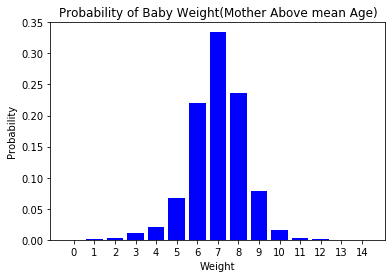

In [187]:
plt.bar(Weight2, Probability2, color ='blue',  
        width = 0.8) 
plt.ylim(0,.35)  
plt.xlabel("Weight") 
plt.ylabel("Probability") 
plt.title("Probability of Baby Weight(Mother Above mean Age)") 
plt.show() 

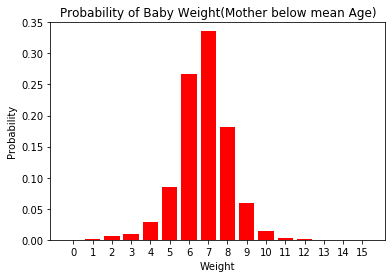

In [188]:
plt.bar(Weight, Probability, color ='red',  
        width = 0.8) 
plt.ylim(0,.35)  
plt.xlabel("Weight") 
plt.ylabel("Probability") 
plt.title("Probability of Baby Weight(Mother below mean Age)") 
plt.show() 

### It can be seen that the graphs do not show much of a difference at all. If we look at the numbers a difference can be seen, but only a limited amount.

In [168]:
s1

,Counts,prob
7.0,1566,0.335979
6.0,1242,0.266466
8.0,845,0.181292
5.0,396,0.084960
9.0,277,0.059429
4.0,134,0.028749
10.0,64,0.013731
3.0,44,0.009440
2.0,29,0.006222
11.0,13,0.002789


In [169]:
s2

,Counts,prob
7.0,1480,0.317528
8.0,1041,0.223343
6.0,976,0.209397
9.0,346,0.074233
5.0,300,0.064364
4.0,88,0.018880
10.0,68,0.014589
3.0,46,0.009869
2.0,16,0.003433
11.0,13,0.002789


### Since they look so similar I wanted to look at an extreme scenario
** Mothers age > 40

In [170]:
Scenario3 = livedata2[livedata2['agepreg'] > 40]

In [174]:
s3 =pd.DataFrame(Scenario3['birthwgt_lb'].value_counts())
s3.head()

,birthwgt_lb
7.0,6
8.0,5
6.0,5
5.0,3
9.0,2


In [175]:
length3 = len(Scenario3)
length3

25

In [176]:
s3.columns = ['Counts']
s3

,Counts
7.0,6
8.0,5
6.0,5
5.0,3
9.0,2
4.0,1
0.0,1
2.0,1


In [183]:
s3["prob"] = s3['Counts']/length3
s3

,Counts,prob
7.0,6,0.24
8.0,5,0.20
6.0,5,0.20
5.0,3,0.12
9.0,2,0.08
4.0,1,0.04
0.0,1,0.04
2.0,1,0.04


In [189]:
d3= {'0': 0.04,'2' : 0.04, '4' :0.04, '5' : 0.12, '6':0.2, '7': 0.24, '8' :0.2, '9':0.08}
Weight3 = list(d3.keys()) 
Probability3 = list(d3.values()) 

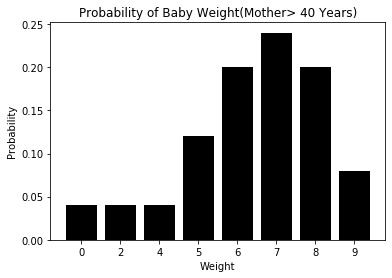

In [190]:
plt.bar(Weight3, Probability3, color ='black',  
        width = 0.8) 
  
plt.xlabel("Weight") 
plt.ylabel("Probability") 
plt.title("Probability of Baby Weight(Mother> 40 Years)") 
plt.show() 

# Create a CDF
** This will further explore Mothers age.

In [192]:
x = np.sort(livedata2['agepreg'])

In [196]:
y= np.arange(1, len(x)+1) / len(x)

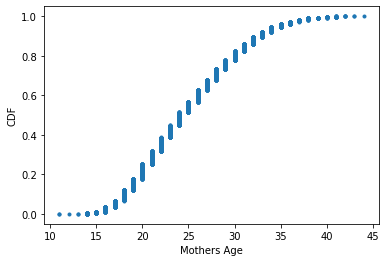

In [201]:
xy = plt.plot(x,y, marker = '.', linestyle = 'none')
xy = plt.xlabel('Mothers Age')
xy = plt.ylabel('CDF')
xy = plt.margins(0.05)

### Let's do another to look at Birthweight as a function of Mothers Age
** Mothers age > mean

In [205]:
x1 = np.sort(Scenario2['birthwgt_lb'])

In [206]:
y1 = y= np.arange(1, len(x1)+1) / len(x1)

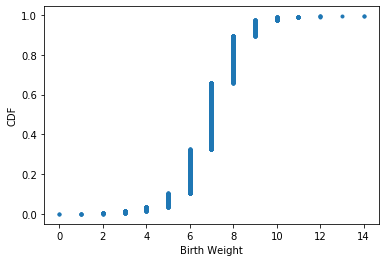

In [208]:
xy1 = plt.plot(x1,y1, marker = '.', linestyle = 'none')
xy1 = plt.xlabel('Birth Weight')
xy1 = plt.ylabel('CDF')
xy1 = plt.margins(0.05)

** These CDFs further strengthen what was shown in the PMFs... That the birthweights are not hihgly subject to change depending on the mothers ade at time of ceonception. 

# Plot an analytical distribution

In [212]:
import seaborn as sns
sns.set_color_codes()

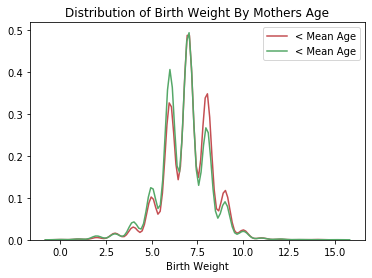

In [224]:
ax = sns.distplot(Scenario2['birthwgt_lb'], color = "r", label = "< Mean Age", hist = False)
ax = sns.distplot(Scenario1['birthwgt_lb'], color = "g", label = "< Mean Age", hist = False)
ax.set(xlabel = "Birth Weight")
ax = plt.legend()
ax = plt.title('Distribution of Birth Weight By Mothers Age')
plt.show()

** It can be seen that there is only a minimal difference in birthweights when Mothers age is separated into below and above mean age groupings.

# Two Scatterplots

### Let's first take a look at preganancy length and birthweight
** As well as give some quantifiable output to validate further

In [245]:
livedatarm= livedata2.dropna()

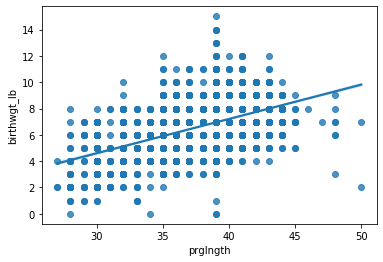

In [251]:
ax1 = sns.regplot(x = livedatarm['prglngth'], y = livedatarm['birthwgt_lb'], data = livedatarm)

** It appears that an increased pregnancy duration has a positive effect on birth weight

In [247]:
list1 = livedatarm['prglngth']
list2 = livedatarm['birthord']
list3 = livedatarm['birthwgt_lb']

In [255]:
from scipy.stats import pearsonr 
from scipy.stats import spearmanr
corr, _ = pearsonr(list1, list3)
corr2, _ = spearmanr(list1, list3)
print("Pregnancy Length on Birthweight \n")
print('Pearsons correlation: %.3f' % corr)
print('Spearmans correlation: %.3f' % corr2)

Pregnancy Length on Birthweight 

Pearsons correlation: 0.446
Spearmans correlation: 0.340


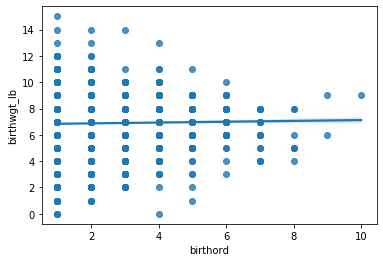

In [252]:
ax2 = sns.regplot(x = livedatarm['birthord'], y = livedatarm['birthwgt_lb'], data = livedatarm)

** Here we can see that birth weight is not senisitve to birth order

In [256]:
corr1, _ = pearsonr(list2, list3)
corr3, _ = spearmanr(list2, list3)
print("Birth Order on Birthweight \n")
print('Pearsons correlation: %.3f' % corr1)
print('Spearmans correlation: %.3f' % corr3)

Birth Order on Birthweight 

Pearsons correlation: 0.024
Spearmans correlation: 0.048


# Hypothesis Testing
** Null Hyothesis = There is no significant difference in the average birthweight of mothers above the mean age.


** Alt Hypothesis = There is a significant difference in average bithweight of mothers above the mean age. 

### Put data into single dataframe.

In [58]:
livedata2['AboveOrBelow'] = np.where(livedata2['agepreg'] <= 24.9, "Below", 'Above')
livedata2.dropna()
livedata2.head()

,prglngth,birthord,birthwgt_lb,agepreg,outcome,AboveOrBelow
0,39,1.0,8.0,33.0,1,Above
1,39,2.0,7.0,39.0,1,Above
2,39,1.0,9.0,14.0,1,Below
3,39,2.0,7.0,18.0,1,Below
4,39,3.0,6.0,18.0,1,Below


# T- Test Hypothesis Testing

In [35]:
livedata2.birthwgt_lb.groupby(livedata2.AboveOrBelow).mean()

AboveOrBelow
Above    6.972881
Below    6.760804
Name: birthwgt_lb, dtype: float64

In [48]:
above= livedata2[livedata2.AboveOrBelow== 'Above']
above1 =pd.DataFrame(above['birthwgt_lb'])
below= livedata2[livedata2.AboveOrBelow== 'Below']
below1= pd.DataFrame(below['birthwgt_lb'])

In [49]:
above1.head()

,birthwgt_lb
0,8.0
1,7.0
5,8.0
6,9.0
7,8.0


In [50]:
below1.head()

,birthwgt_lb
2,9.0
3,7.0
4,6.0
11,7.0
17,6.0


In [57]:
sp.stats.ttest_ind(above1.dropna()['birthwgt_lb'], below1.dropna()['birthwgt_lb'])

Ttest_indResult(statistic=7.452882167416474, pvalue=9.975009567894707e-14)

**From the applied T-test we would accept the null hypothesis becasue the p-value is mych larger than 0.05 (as expected from the close means)

# Regression Analysis

In [105]:
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import statsmodels.api as sm

In [202]:
livedata2["birthwgt_lb"] = livedata2["birthwgt_lb"].fillna(value=livedata2["birthwgt_lb"].mean())
livedata3 =livedata2.loc[:, ['birthwgt_lb', 'agepreg']]
livedata3.head()

,birthwgt_lb,agepreg
0,8.0,33.0
1,7.0,39.0
2,9.0,14.0
3,7.0,18.0
4,6.0,18.0


In [203]:
livedata3.describe()

,birthwgt_lb,agepreg
count,9078.000000,9078.000000
mean,6.864020,24.937321
std,1.349937,5.566541
min,0.000000,11.000000
25%,6.000000,20.000000
50%,7.000000,24.000000
75%,8.000000,29.000000
max,15.000000,44.000000


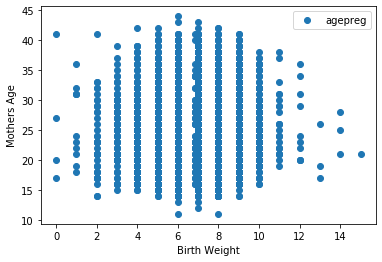

In [205]:
livedata3.plot(x ='birthwgt_lb', y ='agepreg', style ='o')
plt.xlabel('Birth Weight')
plt.ylabel('Mothers Age')
plt.show()

In [233]:
x = livedata3.iloc[:,0].values
y = livedata3.iloc[:,1].values

In [234]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [235]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

In [236]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5446, 1)
(3632, 1)
(5446, 1)
(3632, 1)


In [237]:
regressor = LinearRegression()

In [238]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [240]:
print(regressor.intercept_)

[22.64966647]


In [241]:
print(regressor.coef_)

[[0.3345604]]


In [244]:
y_pred = regressor.predict(X_test)

In [245]:
df88 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df88.head()

,Actual,Predicted
0,19.0,24.991589
1,29.0,24.991589
2,20.0,24.657029
3,17.0,25.326150
4,16.0,24.657029


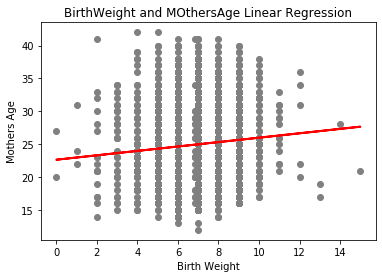

In [248]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('BirthWeight and MOthersAge Linear Regression')
plt.xlabel('Birth Weight')
plt.ylabel('Mothers Age')
plt.show()

In [253]:
data.to_csv(r'C:\Users\wjustice\Desktop\DSC530Final\Dataset.csv') 
